# 1. Comparativo dos algoritmos de classificação

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataf = pd.read_csv("water_potability.csv")

In [3]:
dataf.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
dataf.shape

(3276, 10)

## 1.1 Pré-processamento de dados

In [5]:
dataf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [6]:
dataf.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [7]:
#valores nulos no dataset
dataf.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

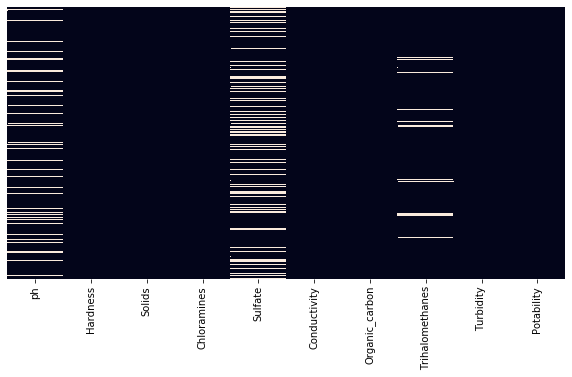

In [8]:
plt.figure(figsize=(10,5))
sns.heatmap(dataf.isnull(),yticklabels=False,cbar=False)

In [9]:
#substituindo valores nulos com média
ndf = dataf
ndf['ph']=dataf['ph'].fillna(dataf['ph'].mean())
ndf['Sulfate']=dataf['Sulfate'].fillna(dataf['Sulfate'].mean())
ndf['Trihalomethanes']=dataf['Trihalomethanes'].fillna(dataf['Trihalomethanes'].mean())

In [10]:
ndf.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

## 1.2 Análise Exploratória

In [11]:
corr_matrix = ndf.corr()

corr_matrix

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.075833,-0.081884,-0.031811,0.014403,0.017192,0.040061,0.002994,-0.036222,-0.003287
Hardness,0.075833,1.000000,-0.046899,-0.030054,-0.092766,-0.023915,0.003610,-0.012690,-0.014449,-0.013837
Solids,-0.081884,-0.046899,1.000000,-0.070148,-0.149840,0.013831,0.010242,-0.008875,0.019546,0.033743
Chloramines,-0.031811,-0.030054,-0.070148,1.000000,0.023791,-0.020486,-0.012653,0.016627,0.002363,0.023779
Sulfate,0.014403,-0.092766,-0.149840,0.023791,1.000000,-0.014059,0.026909,-0.025605,-0.009790,-0.020619
Conductivity,0.017192,-0.023915,0.013831,-0.020486,-0.014059,1.000000,0.020966,0.001255,0.005798,-0.008128
Organic_carbon,0.040061,0.003610,0.010242,-0.012653,0.026909,0.020966,1.000000,-0.012976,-0.027308,-0.030001
Trihalomethanes,0.002994,-0.012690,-0.008875,0.016627,-0.025605,0.001255,-0.012976,1.000000,-0.021502,0.006960
Turbidity,-0.036222,-0.014449,0.019546,0.002363,-0.009790,0.005798,-0.027308,-0.021502,1.000000,0.001581
Potability,-0.003287,-0.013837,0.033743,0.023779,-0.020619,-0.008128,-0.030001,0.006960,0.001581,1.000000


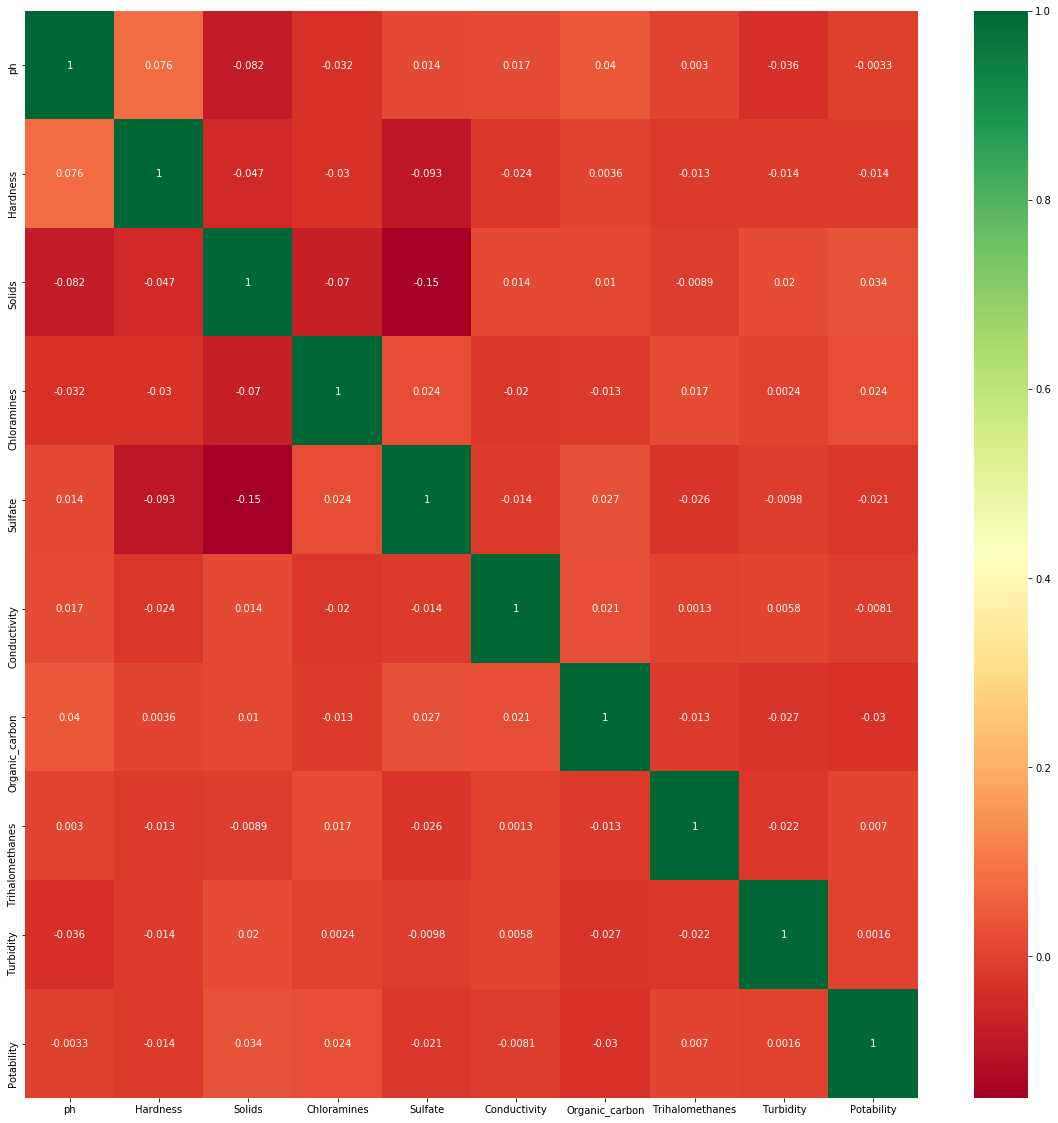

In [12]:
top_corr_features=corr_matrix.index
plt.figure(figsize=(20,20))

# plotar heatmap
g=sns.heatmap(ndf[top_corr_features].corr(), annot=True, cmap="RdYlGn")

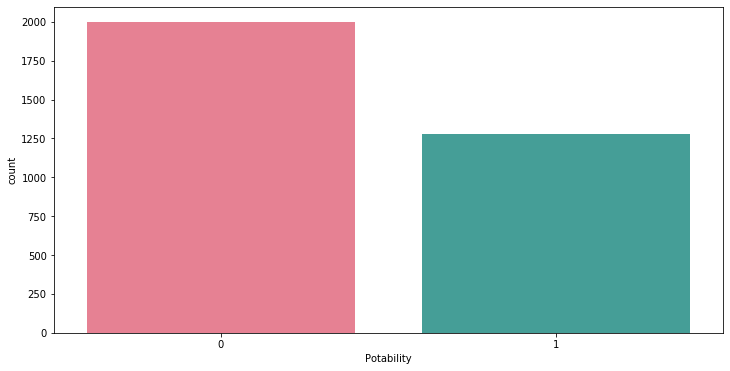

In [13]:
#ocorrências do target 
plt.figure(figsize=(12, 6))
sns.countplot(x="Potability", data=ndf, palette='husl')

#1 significa potável, 0 não potável

### 1.2.1 Distribuição da feature variable

C:\Users\Rebeca\miniconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Rebeca\miniconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Rebeca\miniconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

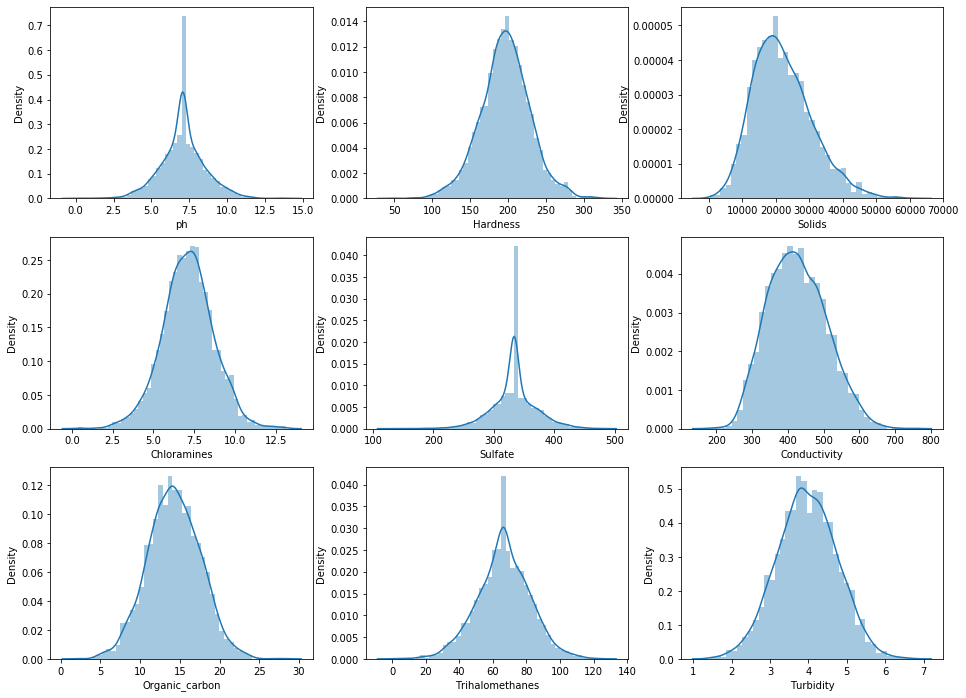

In [14]:
plt.figure(figsize=(16,12))
cdf = ndf.drop('Potability',axis=1)

for i, column in enumerate(cdf.columns, 1):
    plt.subplot(3,3,i)
    sns.distplot(ndf[column])

### 1.2.2 Distributição de cada coluna sobre o target 

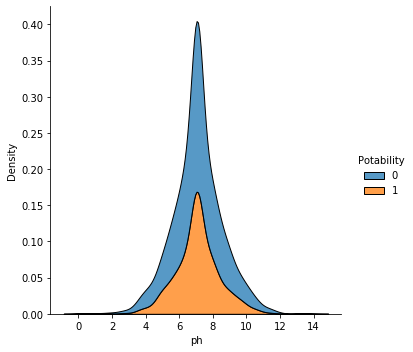

In [15]:
sns.displot(ndf, x="ph", hue="Potability", kind="kde", multiple="stack")

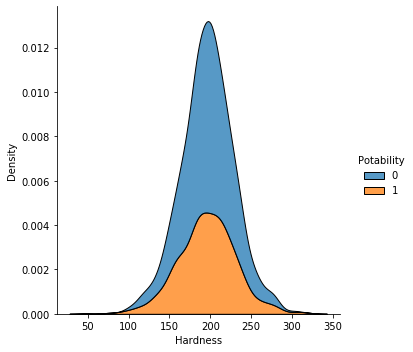

In [16]:
sns.displot(ndf, x="Hardness", hue="Potability", kind="kde", multiple="stack")

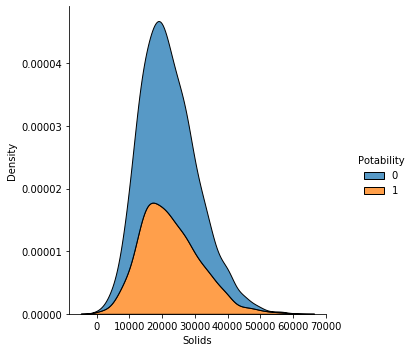

In [17]:
sns.displot(ndf, x="Solids", hue="Potability", kind="kde", multiple="stack")

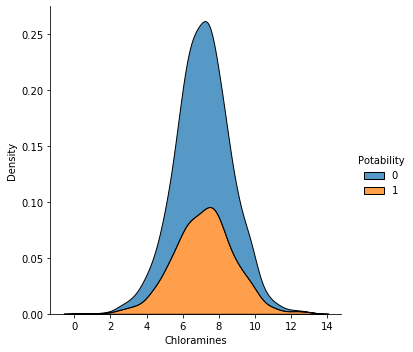

In [18]:
sns.displot(ndf, x="Chloramines", hue="Potability", kind="kde", multiple="stack")

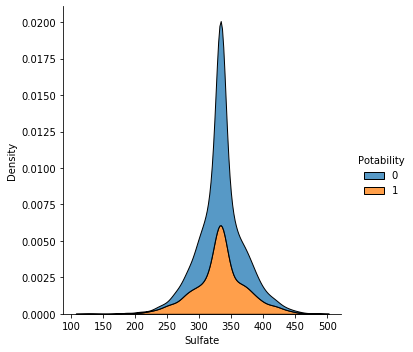

In [19]:
sns.displot(ndf, x="Sulfate", hue="Potability", kind="kde", multiple="stack")

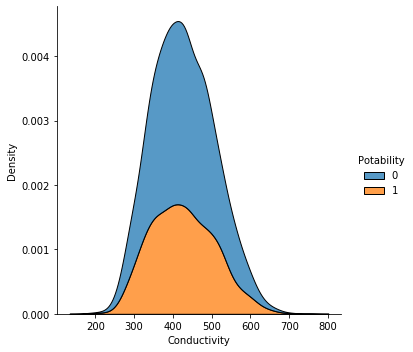

In [20]:
sns.displot(ndf, x="Conductivity", hue="Potability", kind="kde", multiple="stack")

### 1.2.3 Box Plots

In [21]:
cols = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity']

C:\Users\Rebeca\miniconda3\lib\site-packages\ipykernel_launcher.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


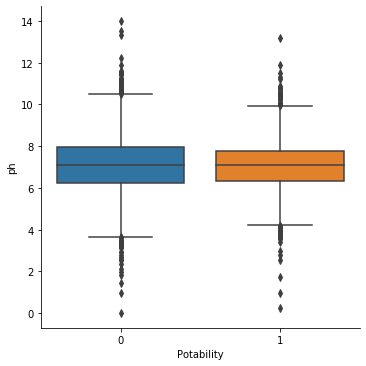

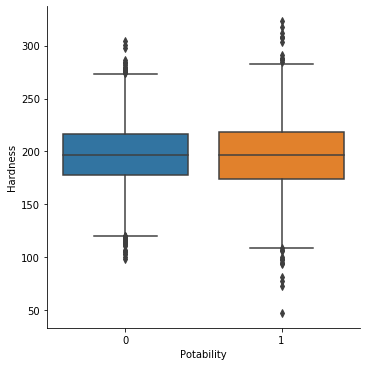

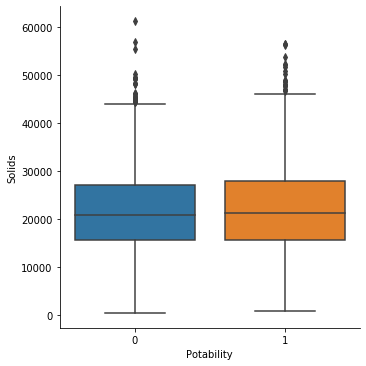

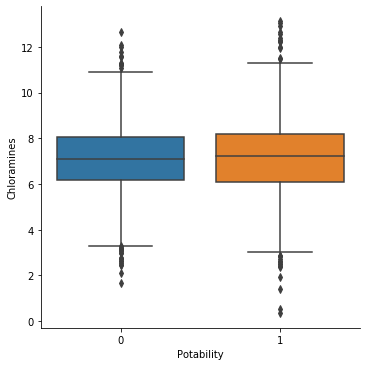

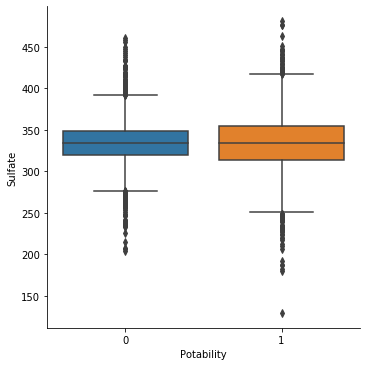

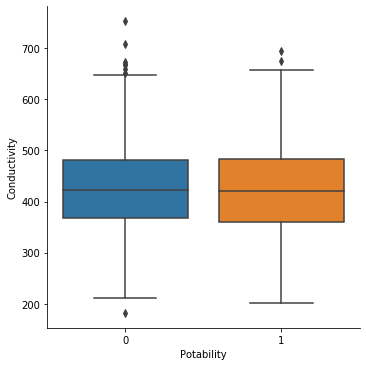

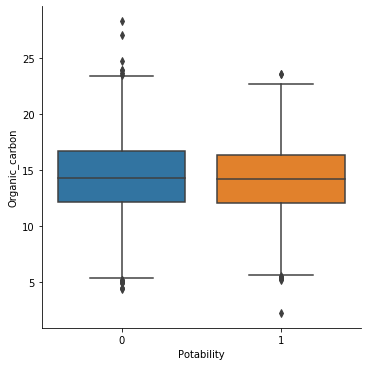

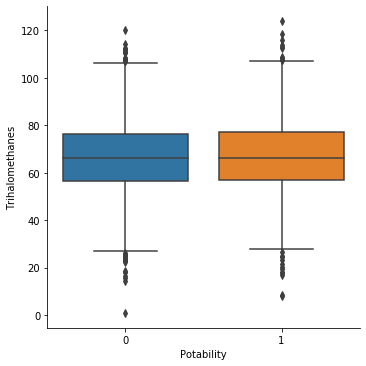

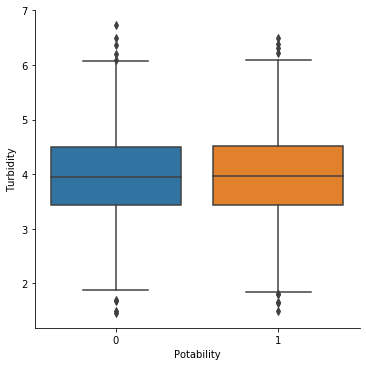

In [22]:
from tqdm import tqdm_notebook

def boxPlotter(dataset, columnName):
    #Plota boxplots pela coluna dada como parâmetro
    sns.catplot(x="Potability", y=columnName, data=ndf, kind="box");
for column in tqdm_notebook(cols, desc = "Your Charts are being ready"):
    boxPlotter(ndf, column)

In [23]:
def pieChartPlotter(dataset, columnName):
    values = dataset[columnName].value_counts()
    labels = dataset[columnName].unique()
    pie, ax = plt.subplots(figsize=[10, 6])

    patches, texts, autotexts = ax.pie(values, labels=labels, autopct='%1.2f%%', shadow=True, pctdistance=.5,explode=[0.06]*dataset[columnName].unique()
                                       )

    plt.legend(patches, labels, loc="best")
    plt.title(columnName, color='white', fontsize=14)
    plt.setp(texts, color='white', fontsize=20)
    plt.setp(autotexts, size=10, color='black')
    autotexts[1].set_color('black')
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

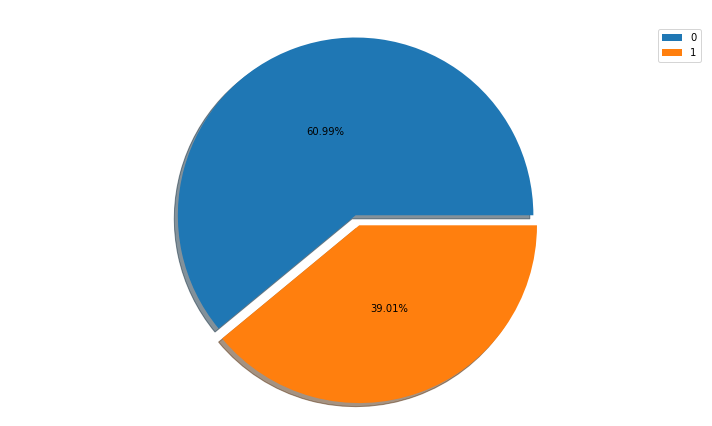

In [24]:
pieChartPlotter(ndf, 'Potability') 

## 1.3 Treinamento dos modelos 

In [25]:
from sklearn.model_selection import train_test_split

X = ndf.drop(columns=["Potability"])
y = ndf["Potability"]

x_train , x_test, y_train, y_test = train_test_split(X,y,test_size=0.1, random_state=101)

In [26]:
X = pd.concat([x_train,y_train], axis=1)

In [27]:
class_count_0, class_count_1 = X['Potability'].value_counts()

class_0 = X[X['Potability'] == 0]
class_1 = X[X['Potability'] == 1]
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (1797, 10)
class 1: (1151, 10)


total class of 1 and 0:
 1    1151
0    1151
Name: Potability, dtype: int64


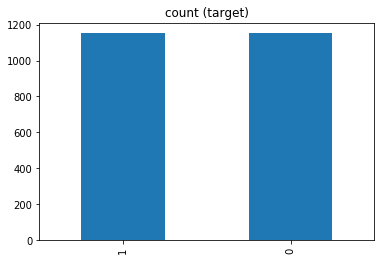

In [28]:
#balanceamento de classes
class_0_under = class_0.sample(class_count_1)

test_under = pd.concat([class_0_under, class_1], axis=0)
test_under["Potability"] = test_under["Potability"].astype("int")
print("total class of 1 and 0:\n",test_under['Potability'].value_counts())# plot the count after under-sampeling
test_under['Potability'].value_counts().plot(kind='bar', title='count (target)')

In [29]:
x_train = test_under.drop(columns=["Potability"])
y_train = test_under["Potability"]

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

### Árvore de Decisão
Classificadores de árvore de decisão são modelos atraentes se nos preocupamos com a interpretabilidade. Como o nome árvore de decisão sugere, podemos pensar neste modelo como dividindo nossos dados ao tomar decisões com base em uma série de perguntas. Com base nas features de nosso conjunto de treinamento, o modelo de árvore de decisão aprende uma série de perguntas para inferir os rótulos de classe das amostras. Usando o algoritmo de decisão, começamos na raiz da árvore e dividimos os dados na feature que resulta no maior ganho de informação (métrica que mede a qualidade de uma divisão). Em um processo iterativo, podemos repetir esse procedimento de divisão em cada nó filho até que as folhas estejam puras. Isso significa que todas as amostras em cada nó pertencem à mesma classe. Na prática, isso pode resultar em uma árvore muito profunda com muitos nós, o que pode facilmente levar a overfitting. Portanto, normalmente queremos podar a árvore definindo um limite para a profundidade máxima da árvore [1]

In [49]:
models = []
models.append(("LogisticRegression",LogisticRegression()))
models.append(("DecisionTreeClassifier",DecisionTreeClassifier()))

In [50]:
from sklearn.metrics import f1_score,precision_score,recall_score,accuracy_score

In [51]:
model_name = []
f1_Score = []
accuracy = []
precision_Score = []
recall = []

In [52]:
for name, model in models:
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    acc = accuracy_score(y_test,pred)
    model_name.append(name)
    accuracy.append(acc)
    
    f1score = f1_score(y_test,pred)
    f1_Score.append(f1score)
    
    pre_score = precision_score(y_test,pred)
    precision_Score.append(pre_score)
    
    rec_score = recall_score(y_test,pred)
    recall.append(rec_score)
    
    print("For {} F1 score = {} Accuracy = {} Precision = {} Recall = {}\n".format(name,acc,f1score,pre_score,rec_score))

For LogisticRegression F1 score = 0.5426829268292683 Accuracy = 0.4863013698630137 Precision = 0.4303030303030303 Recall = 0.5590551181102362

For DecisionTreeClassifier F1 score = 0.573170731707317 Accuracy = 0.4890510948905109 Precision = 0.4557823129251701 Recall = 0.5275590551181102



In [53]:
d = pd.DataFrame()
d["model"] = model_name
d["accuracy"] = accuracy
d["f1_score"] = f1_Score
d["precision"] = precision_Score
d["recall"] = recall

In [54]:
import plotly.express as px

df = d.sort_values(by="accuracy",ascending=True)
fig = px.line(df, x = "model",y="accuracy",title="Comparação Acurácia")
fig.show()

In [55]:
df = d.sort_values(by="f1_score",ascending=True)
fig = px.line(df, x = "model",y="f1_score",title=" Comparação F1 Score")
fig.show()

In [56]:
df = d.sort_values(by="precision",ascending=True)
fig = px.line(df, x = "model",y="precision",title="Comparação Precisão")
fig.show()

In [57]:
df = d.sort_values(by="recall",ascending=True)
fig = px.line(df, x = "model",y="recall",title="Comparação Recall")
fig.show()

# 2. Algoritmos de regressão

In [58]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import multiprocessing
import warnings
warnings.filterwarnings("ignore")

In [60]:
df = pd.read_csv("Summary of Weather.csv")

In [61]:
df.head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
#Reshape para converter 1 numpy 1D array para 2D
X = df['MinTemp'].values.reshape(-1,1)         
#X contém as observações da variável independente

Y = df['MaxTemp'].values.reshape(-1,1)         
#Y contém as observações da variável dependente

In [63]:
print("Tipo e tamanho de X:", type(X), X.shape)
print("Tipo e tamanho de Y:", type(Y), Y.shape)

Tipo e tamanho de X: <class 'numpy.ndarray'> (119040, 1)
Tipo e tamanho de Y: <class 'numpy.ndarray'> (119040, 1)


## 2.1 Visualização de dados

Text(0, 0.5, 'MaxTemp')

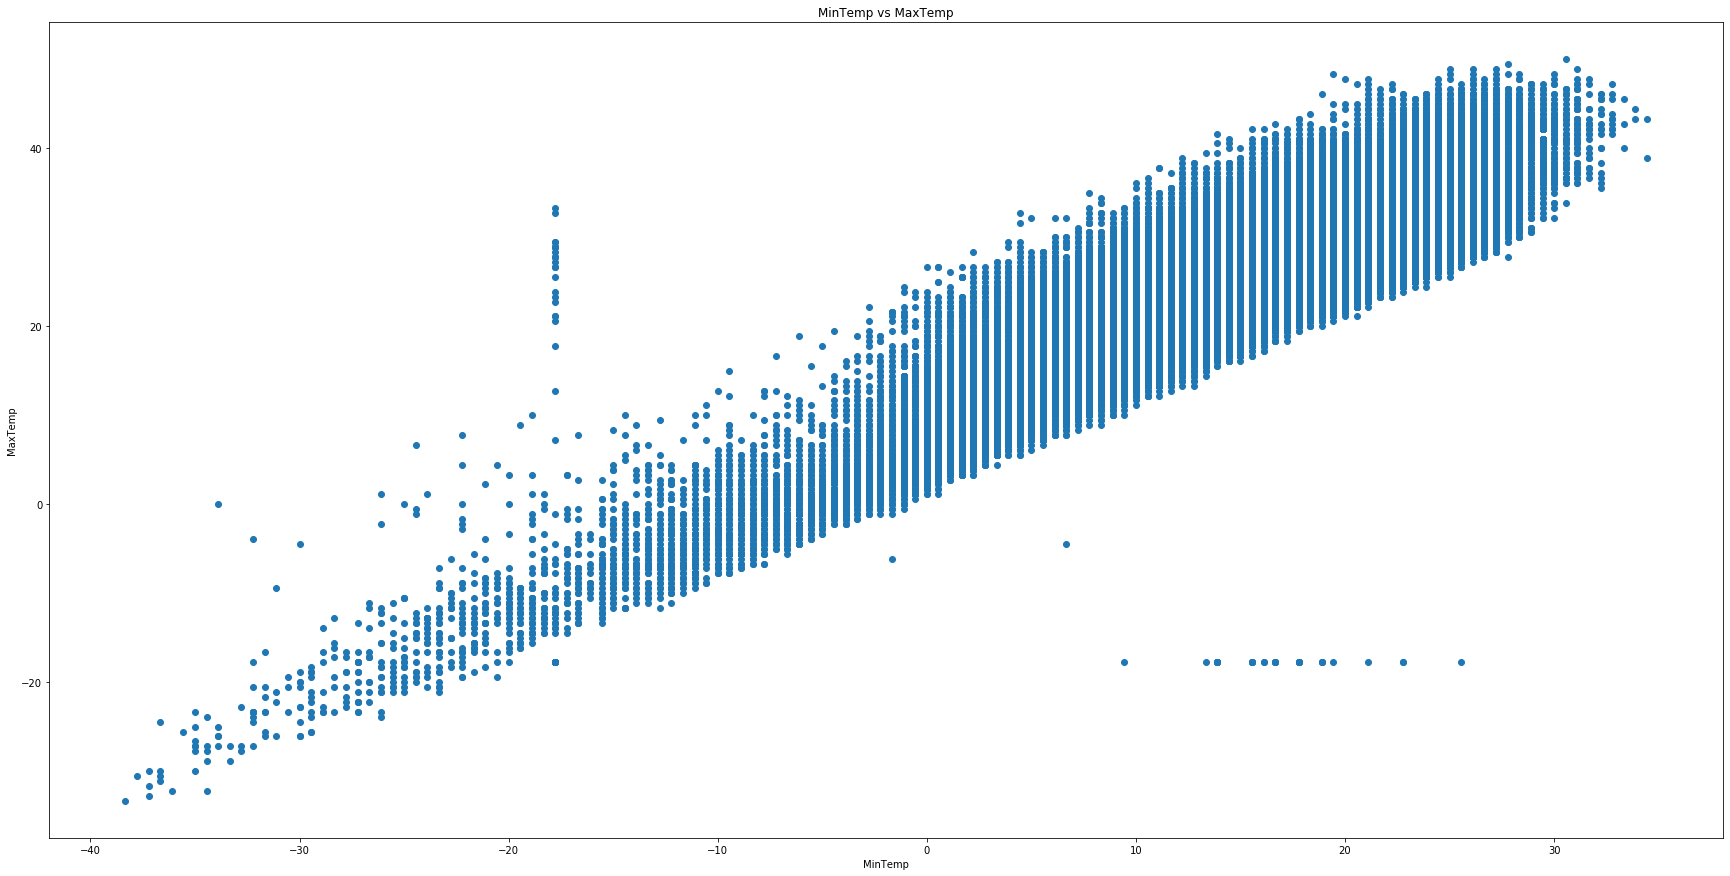

In [64]:
#Scatter plot dos dados

width = 30
height = 15
plt.figure(figsize=(width, height))

plt.scatter(X,Y)
plt.title('MinTemp vs MaxTemp')  
plt.xlabel('MinTemp')  
plt.ylabel('MaxTemp')  

Text(0, 0.5, 'Densidade das observações')

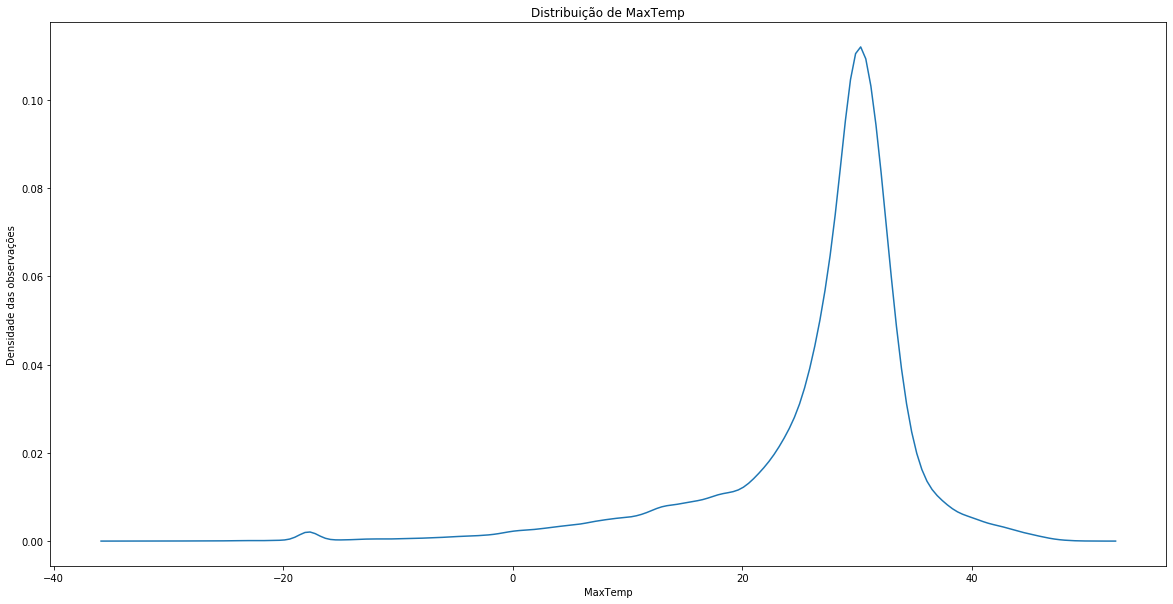

In [65]:
#Gráfico de distribuição de MaxTemp

width = 20
height = 10
plt.figure(figsize=(width, height))
sns.distplot(Y, hist=False, label="MaxTemp")

plt.title('Distribuição de MaxTemp')  
plt.xlabel('MaxTemp')
plt.ylabel('Densidade das observações')

## 2.2 Treinamento dos modelos 

In [66]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=1)

print('Quantidade de elementos no train set:', X_train.size)
print('Quantidade de elementos no test set:', Y_test.size)
print("Shape dos vetores de treino e teste:", Y_train.shape, X_test.shape)

Quantidade de elementos no train set: 107136
Quantidade de elementos no test set: 11904
Shape dos vetores de treino e teste: (107136, 1) (11904, 1)


In [68]:
lm = LinearRegression()

lm.fit(X_train,Y_train)

print('A interceptação aprendida e os coeficientes são:', lm.intercept_, lm.coef_) 

A interceptação aprendida e os coeficientes são: [10.67717734] [[0.91988877]]


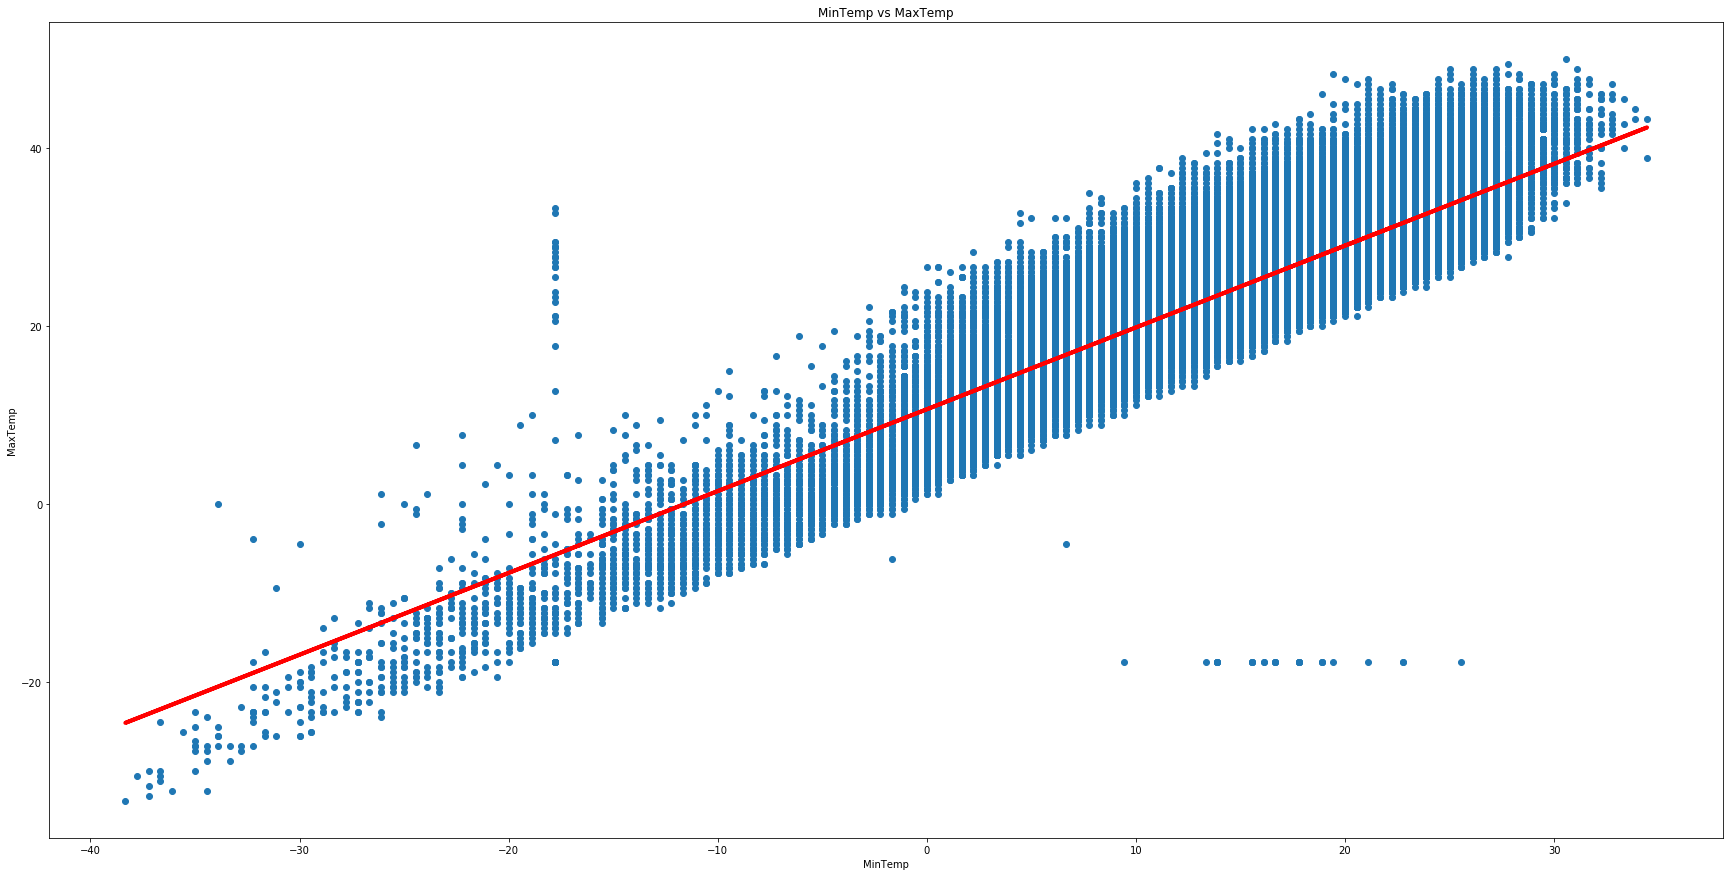

In [69]:
#Predições

Yhat = lm.predict(X)

width = 30
height = 15
plt.figure(figsize=(width, height))

plt.scatter(X,Y)
plt.plot(X, Yhat, color='red', linewidth=4)
plt.title('MinTemp vs MaxTemp')  
plt.xlabel('MinTemp')  
plt.ylabel('MaxTemp')
plt.show()

In [70]:
#Métricas

print('Acurácia do modelo de regressão linear no test set:', lm.score(X_test, Y_test))

Yhat_test = lm.predict(X_test)
print('Erro quadrático médio do modelo de regressão linear no test set:', mean_squared_error(Y_test, Yhat_test))

Acurácia do modelo de regressão linear no test set: 0.7693857293043108
Erro quadrático médio do modelo de regressão linear no test set: 17.447979540673504


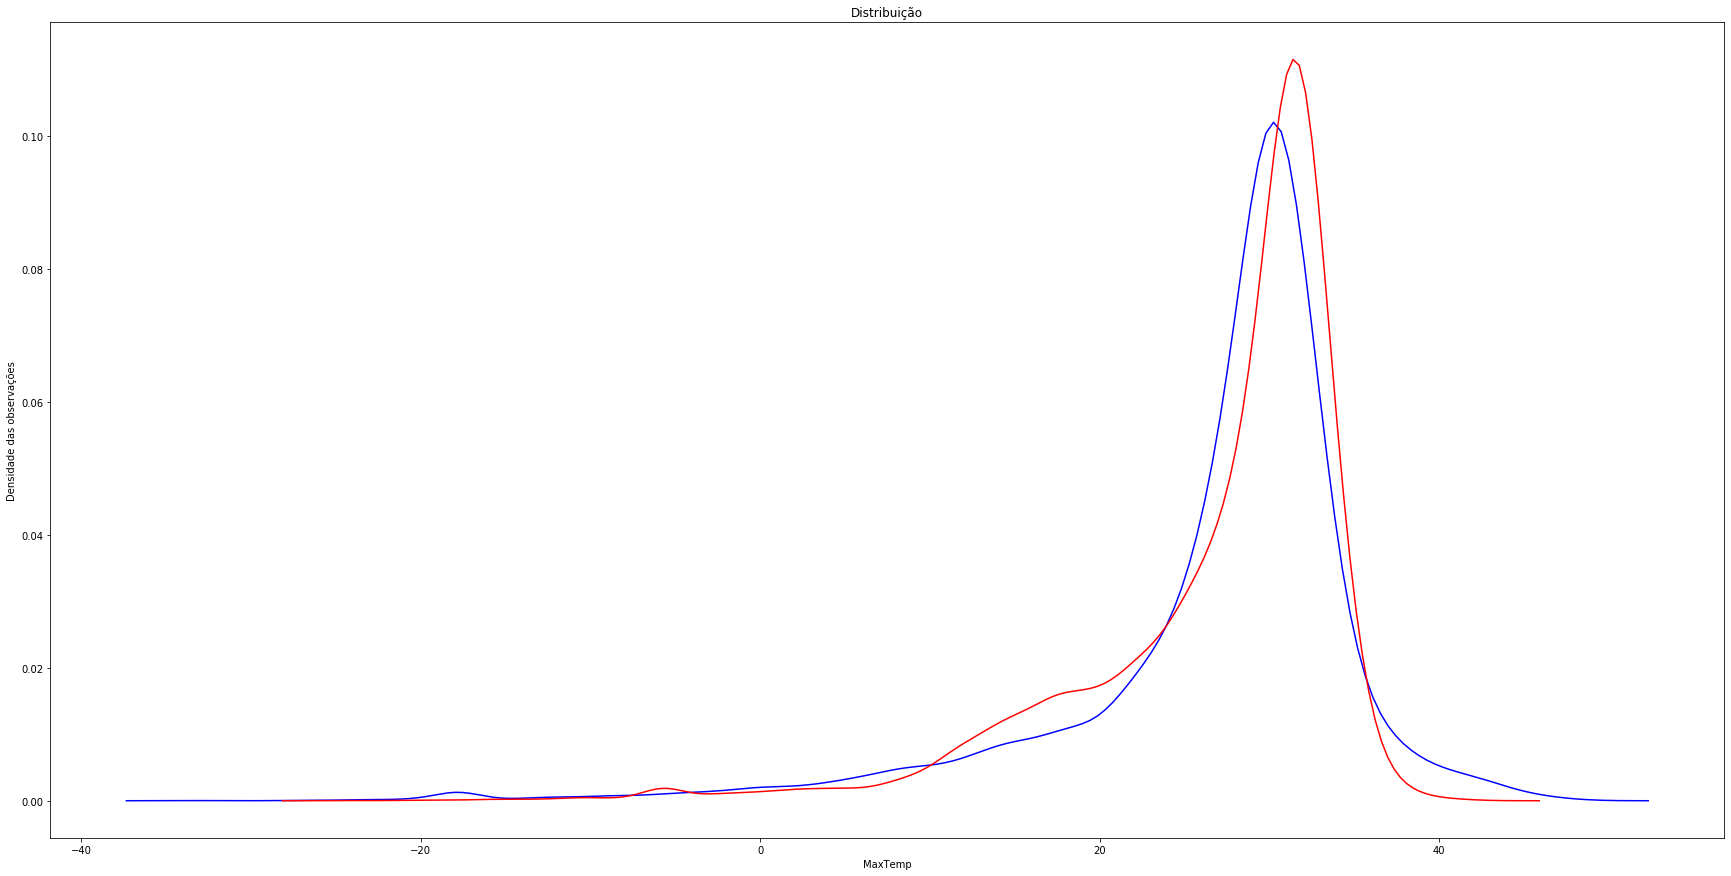

In [71]:
#Comparando a distribuição das temperaturas máximas preditas com o atual

width = 30
height = 15
plt.figure(figsize=(width, height))

#Plotando as distribuições atual e predita 
ax1 = sns.distplot(Y_test, hist=False, color="b", label="Actual Value")
sns.distplot(Yhat_test, hist=False, color="r", label="Predicted Values" , ax=ax1)

plt.title('Distribuição')  
plt.xlabel('MaxTemp')
plt.ylabel('Densidade das observações')

plt.show()
plt.close()

### 2.2.1 Regressão Polinomial 

A Regressão Ridge (também chamada de regularização de Tikhonov) é uma versão regularizada da Regressão Linear. Essa regularização força o algoritmo de aprendizado não apenas a ajustar os dados, mas também a manter os pesos do modelo os menores possíveis. Observe que o termo de regularização só deve ser adicionado à função de custo durante o treinamento. Depois que o modelo é treinado, você deseja usar a medida de desempenho não regularizada para avaliar o desempenho do modelo. [2]

In [72]:
CV_param_grid = [{'alpha': [0.1, 0.2, 0.4, 0.8, 1.6, 3.2, 6.4] }]

CV_best_estimators = []
CV_best_r2_scores = []
CV_best_mse_scores = []
CV_best_params = []

random_state = 47

degrees = 20
for d in range(degrees):
    pf = PolynomialFeatures(degree=d+1)
    Xd = pf.fit_transform(X_train)
    
    # O GridSearch computa ambos, o r^2 e o mse negativo, mas seleciona o melhor modelo
    #baseado na pontuação r^2.
    Grid = GridSearchCV(estimator= Ridge(random_state = random_state), param_grid=CV_param_grid, scoring=['r2','neg_mean_squared_error'], 
                        cv=20, refit='r2', n_jobs=multiprocessing.cpu_count())
    Grid.fit(Xd, Y_train)
    CV_best_estimators.append(Grid.best_estimator_)
    CV_best_r2_scores.append(Grid.best_score_)
    CV_best_mse_scores.append((-1)*Grid.cv_results_['mean_test_neg_mean_squared_error'][Grid.best_index_])
    CV_best_params.append(Grid.best_params_)

In [73]:
print('Lista dos melhores parâmetros para cada grau:\n', CV_best_params)
print('Lista dos melhores CV r^2 scores para cada grau:\n', CV_best_r2_scores)
print('Lista dos melhores CV mse scores para cada grau:\n', CV_best_mse_scores)

Lista dos melhores parâmetros para cada grau:
 [{'alpha': 6.4}, {'alpha': 6.4}, {'alpha': 6.4}, {'alpha': 6.4}, {'alpha': 0.1}, {'alpha': 0.1}, {'alpha': 0.1}, {'alpha': 0.1}, {'alpha': 0.1}, {'alpha': 6.4}, {'alpha': 6.4}, {'alpha': 6.4}, {'alpha': 0.1}, {'alpha': 6.4}, {'alpha': 0.1}, {'alpha': 6.4}, {'alpha': 6.4}, {'alpha': 6.4}, {'alpha': 0.2}, {'alpha': 0.1}]
Lista dos melhores CV r^2 scores para cada grau:
 [0.7715095206206801, 0.7898940107495716, 0.7947371867361084, 0.7961706566265724, 0.8015680570372895, 0.8029728170787805, 0.8032542957310345, 0.8033900618043409, 0.8036310100013093, 0.8037427192105204, 0.8043915768082555, 0.8044157377729075, 0.8048226479305178, 0.8048873456051281, 0.8048773805926309, 0.8050818424807724, 0.8050037762493243, 0.8054690545443624, 0.8054578772796633, 0.8053791016245004]
Lista dos melhores CV mse scores para cada grau:
 [17.35323783593522, 15.957453900381799, 15.589485421501106, 15.48114921789465, 15.071834349780364, 14.964575032176887, 14.942878706

In [74]:
test_r2_scores = []
test_mse_scores = []


for d in range(degrees):
    pf = PolynomialFeatures(degree=d+1)
    Xd_test = pf.fit_transform(X_test)
    Ydhat = CV_best_estimators[d].predict(Xd_test)
    test_r2_scores.append(r2_score(Ydhat, Y_test))
    test_mse_scores.append(mean_squared_error(Ydhat, Y_test))

In [75]:
print('Lista dos r^2 scores no test set para cada grau:\n', test_r2_scores)
print('Lista dos mse scores no test set para cada grau:\n', test_mse_scores)

Lista dos r^2 scores no test set para cada grau:
 [0.7074066579575675, 0.7423811897899724, 0.7488813374491046, 0.7514142703859901, 0.7573152053202645, 0.7594954107666329, 0.7598930498618767, 0.7603640423015339, 0.7606178159011314, 0.7617051976155294, 0.7593049342410281, 0.7600741482311627, 0.7616932694150413, 0.7617148713832911, 0.7618481128806431, 0.7585530269681237, 0.7587396229725673, 0.7626578328121805, 0.7626797047043916, 0.7626057922075584]
Lista dos mse scores no test set para cada grau:
 [17.447978313426955, 15.913660023166644, 15.530673994125431, 15.42089528200168, 15.095475310070944, 14.97863521297939, 14.990499352486708, 14.95882058261346, 14.919135535791794, 14.87819159804826, 14.912972034118061, 14.884253665355622, 14.85863994998711, 14.822115584677968, 14.8350094930039, 14.933009726771537, 14.923429421689448, 14.817692516253077, 14.806276559636661, 14.84700660636202]


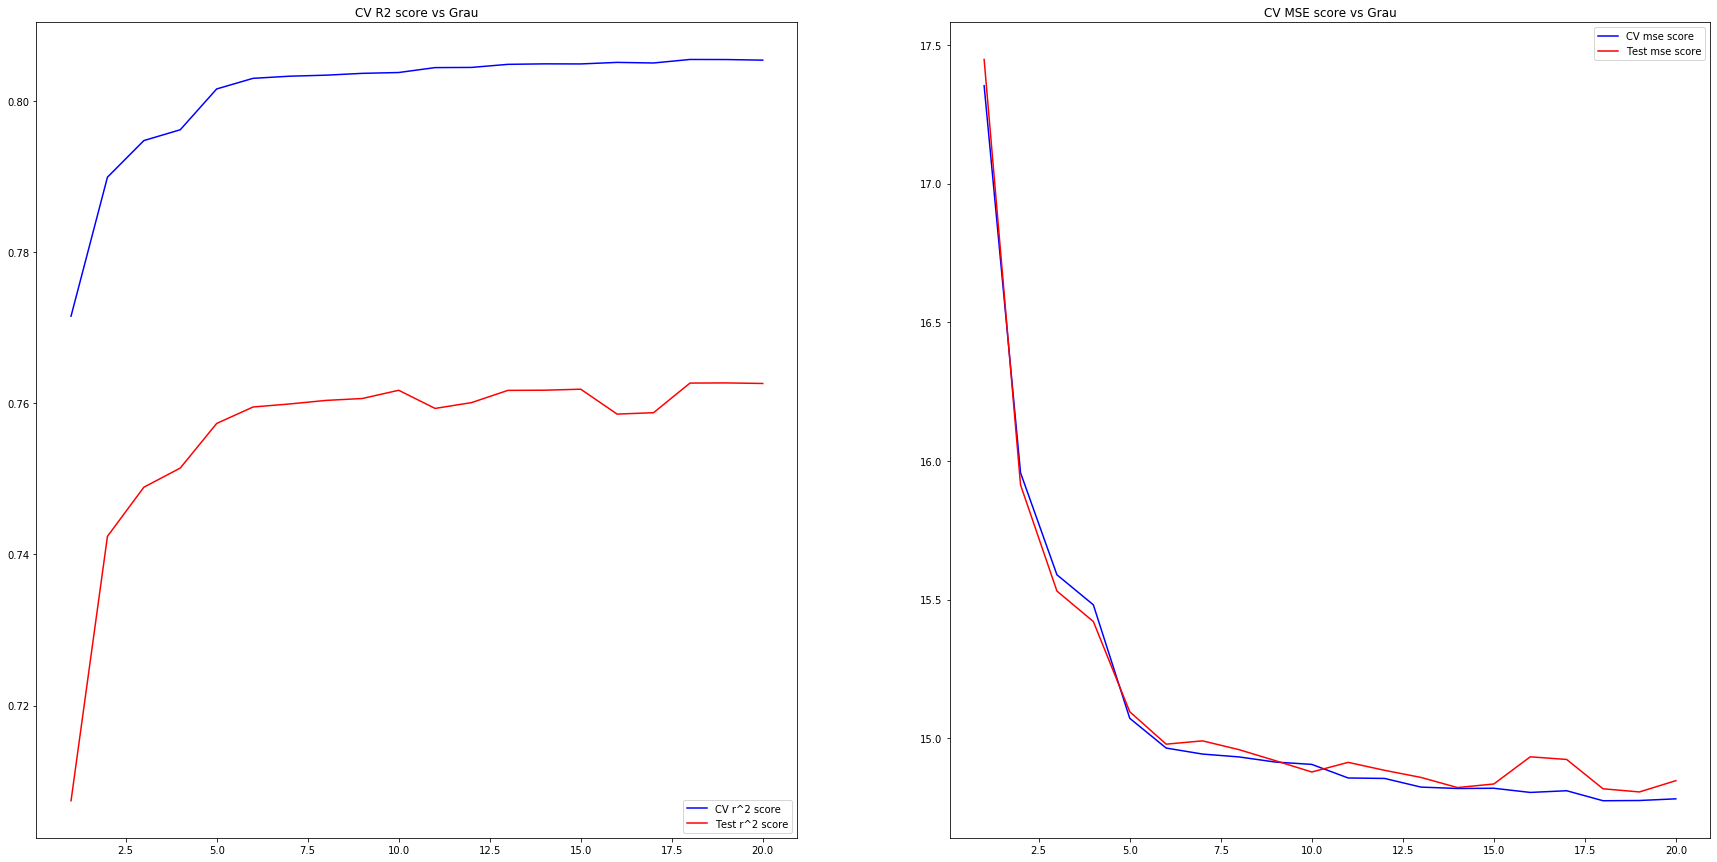

In [76]:
#Plotando os scores r^2 e mse por grau

width = 30
height = 15
plt.figure(figsize=(width, height))

plt.subplot(1, 2, 1)
plt.plot(range(1,degrees+1), CV_best_r2_scores, color='blue', label="CV r^2 score")
plt.plot(range(1,degrees+1), test_r2_scores, color='red', label="Test r^2 score")
plt.legend(loc="lower right")
plt.title('CV R2 score vs Grau') 

plt.subplot(1, 2, 2)
plt.plot(range(1,degrees+1), CV_best_mse_scores, color='blue', label="CV mse score")
plt.plot(range(1,degrees+1), test_mse_scores, color='red', label="Test mse score")
plt.legend(loc="top right")
plt.title('CV MSE score vs Grau') 

plt.show()

In [77]:
best_d_r2_cv = CV_best_r2_scores.index(max(CV_best_r2_scores))+1
best_d_mse_cv = CV_best_mse_scores.index(min(CV_best_mse_scores))+1

print("Grau com o melhor CV R^2 score:", best_d_r2_cv)
print("Grau com o melhor CV MSE score:", best_d_mse_cv)

Grau com o melhor CV R^2 score: 18
Grau com o melhor CV MSE score: 18


In [78]:
BestModel = CV_best_estimators[best_d_r2_cv-1]
BestModel

Ridge(alpha=6.4, random_state=47)

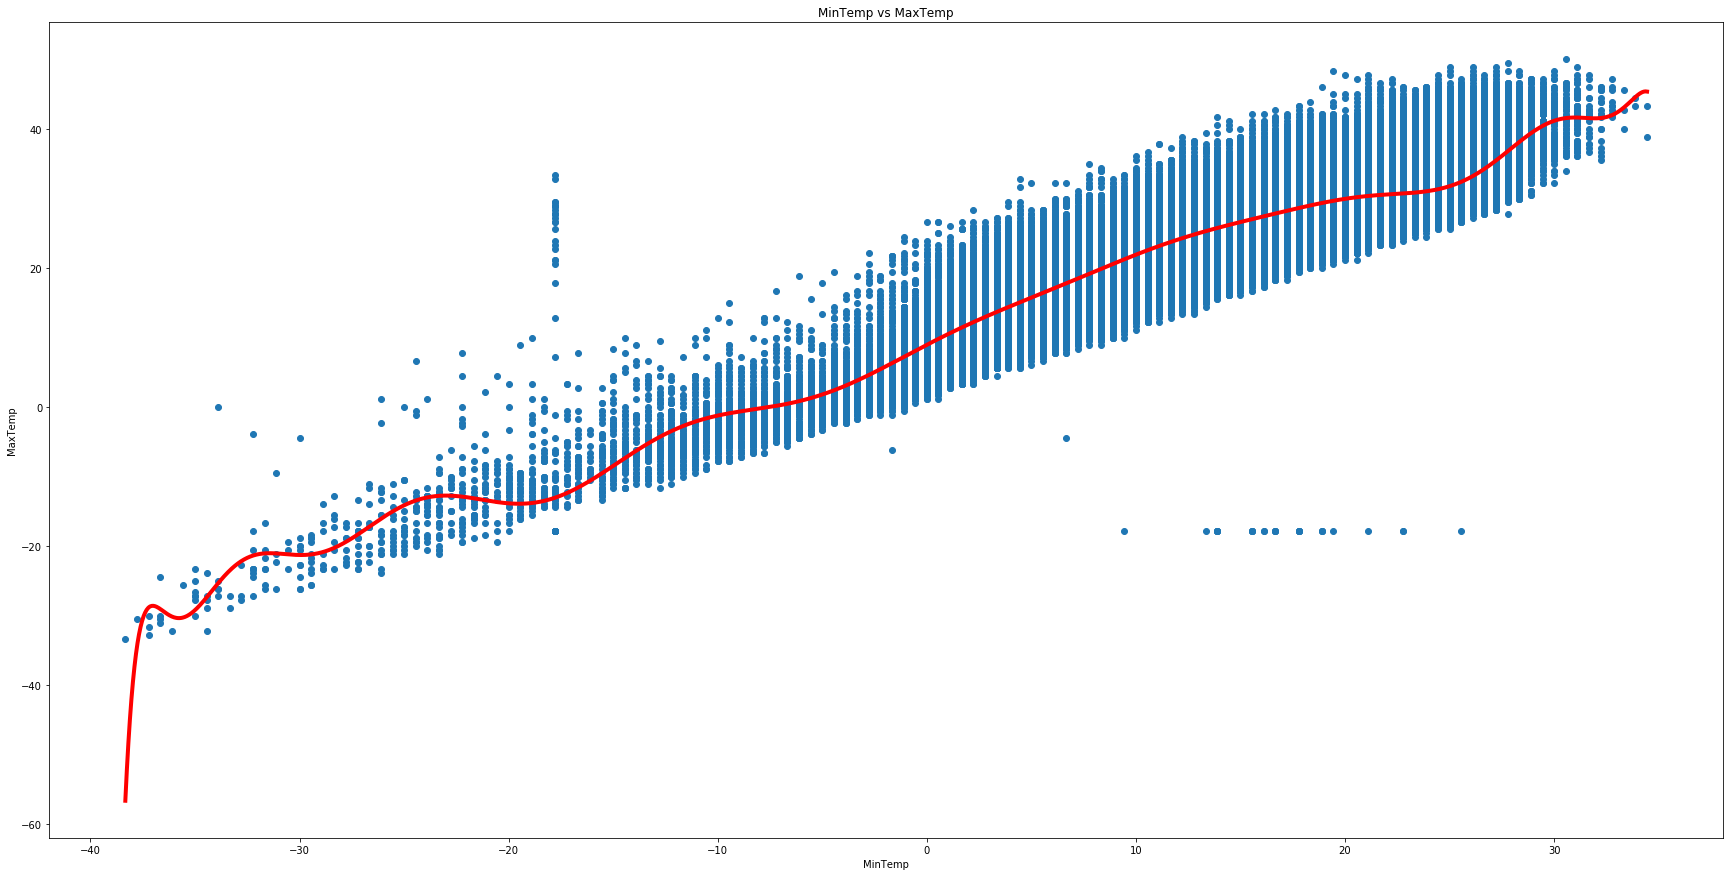

In [79]:
# Plotando a curva no modelo treinado
X_new = np.linspace(min(X), max(X), 2000).reshape(2000,1)
pf = PolynomialFeatures(degree= best_d_r2_cv)
X_trans = pf.fit_transform(X_new)
Yhat_trans = BestModel.predict(X_trans)

#Plotando predições
width = 30
height = 15
plt.figure(figsize=(width, height))

plt.scatter(X,Y)
plt.plot(X_new, Yhat_trans, color='red', linewidth=4)
plt.title('MinTemp vs MaxTemp')  
plt.xlabel('MinTemp')  
plt.ylabel('MaxTemp')
plt.show()

In [80]:
pf = PolynomialFeatures(degree= best_d_r2_cv)
Xd_test = pf.fit_transform(X_test)
Ydhat_test = BestModel.predict(Xd_test)

print('Acurácia do modelo de regressão polinomial sobre o test set:', BestModel.score(Xd_test, Y_test))

print('Erro quadrático médio do modelo de regressão polinomial sobre o test set:', mean_squared_error(Y_test, Ydhat_test))

Acurácia do modelo de regressão polinomial sobre o test set: 0.8041508849169152
Erro quadrático médio do modelo de regressão polinomial sobre o test set: 14.817692516253077


O modelo polinomial apresenta os erros mse e  r^2 melhores que o modelo linear (em torno de 0.76 e 17.6 respectivamente).

# Referências

[1] RASCHKA, Sebastian; MIRJALILI, Vahid. Python machine learning. Packt Publishing Ltd, 2017.


[2] GÉRON, Aurélien. Hands-on machine learning with Scikit-Learn, Keras, and TensorFlow: Concepts, tools, and techniques to build intelligent systems. O'Reilly Media, 2019.